## 1D Diffusion exercise

#### Import Statements

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib.animation import FuncAnimation
PI = math.pi

#### Object Definitions

In [2]:
class particle(object):

    def __init__(self, radius, position, ID):
        self._radius = radius
        self._position = position
        self._ID = ID

    #getters
    @property
    def radius(self):
        return self._radius

    @property
    def position(self):
        return self._position
    
    @property
    def ID(self):
        return self._ID

    #setters
    @radius.setter
    def radius(self,value):
        self._radius = value
    
    @position.setter
    def position(self,value):
        self._position=value
    
    @ID.setter
    def ID(self,value):
        self._ID=value

    #deleters
    @radius.deleter
    def radius(self):
        del self._radius
    
    @position.deleter
    def position(self):
        del self._position
    
    @ID.deleter
    def ID(self):
        del self._ID

class ftsz(object):
    
    def __init__(self, length, position, ID):
        self._length=length
        self._position=position
        self._ID=ID
    
    @property
    def length(self):
        return self.length

    @property
    def position(self):
        return self._position
    
    @property
    def ID(self):
        return self._ID

    #setters
    @length.setter
    def length(self,value):
        self._length = value
    
    @position.setter
    def position(self,value):
        self._position=value
    
    @ID.setter
    def ID(self,value):
        self._ID=value

#### Graph of 1D walk

In [ ]:
def step(particle):
    return particle+random.choice([-1,0,1])

def go(n):
    p=0
    l=[]
    for i in range(n):
        p=step(p)
        l.append(p)
    return l


plt.plot(go(1000))

#### Alternative collision code

In [656]:
#moves entire list by one step; takes collisions into account
def moveParticleListElastic(particle_list):
    for i in range(len(particle_list)):
        p1=particle_list[i]
        for j in range(i+1,len(particle_list)):
            p2=particle_list[j]
            NP1=newParticlePos(p1)
            NP2=newParticlePos(p2)
            if (math.sqrt((NP2[0]-NP1[0])**2+(NP2[1]-NP1[1])**2))<=5:
                v1=(p1.position[0]-NP1[0])**2+(p1.position[1]-NP1[1])**2
                v2=(p2.position[0]-NP2[0])**2+(p2.position[1]-NP2[1])**2
                s1=(p1.position[1]-NP1[1])/(p1.position[0]-NP1[0])
                s2=(p2.position[1]-NP2[1])/(p2.position[0]-NP2[0])
                theta1=math.atan(s1)
                theta2=math.atan(s2)
                anglei=theta1-theta2
                newp2d=(v1*math.sin(2*anglei)+v2*math.sin(anglei))**2
                newp1d=(v1*math.cos(2*anglei)+v2*math.cos(anglei))**2
                n=75
                x2=p2.position[0]+newp2d*math.sin(theta2-anglei)*n
                y2=p2.position[1]+newp2d*math.cos(theta2-anglei)*n
                x1=p1.position[0]+newp1d*math.cos(theta2-anglei)*n
                y1=p1.position[1]+newp1d*math.sin(theta2-anglei)*n
                print("collision")
            else:
                x1=NP1[0]
                y1=NP1[1]
                x2=NP2[0]
                y2=NP2[1]
            p1.position= ((x1+50) % 100-50,(y1+50) % 100-50)
            p2.position= ((x2+50) % 100-50,(y2+50) % 100-50)

#moves entire list by one step; takes collisions into account
def moveParticleListRandom(particle_list):
    for i in range(len(particle_list)):
        p1=particle_list[i]
        for j in range(i+1,len(particle_list)):
            p2=particle_list[j]
            NP1=newParticlePos(p1)
            NP2=newParticlePos(p2)
            while (math.sqrt((NP2[0]-NP1[0])**2+(NP2[1]-NP1[1])**2))<=5:
                NP1=(newParticlePos(p1)[0]+0.4,newParticlePos(p1)[1]+0.4)
                NP2=newParticlePos(p2)
            x1=NP1[0]
            y1=NP1[1]
            x2=NP2[0]
            y2=NP2[1]
            p1.position= ((x1+50) % 100-50,(y1+50) % 100-50)
            p2.position= ((x2+50) % 100-50,(y2+50) % 100-50)

#method to change position of particle by a unit step 
def newParticlePos(particle_name):
    x=newBrownianLocation(particle_name,0.000001)[0]
    y=newBrownianLocation(particle_name,0.000001)[1]
    return (x,y)

#calculate what the new location would be just based off Brownian Motion
def newBrownianLocation(particle_name,dt):
    theta=random.uniform(0,2*PI)
    r=math.sqrt(160000*dt)
    dx=r*math.cos(theta)
    dy=r*math.sin(theta)

    return (particle_name.position[0]+dx,particle_name.position[1]+dy)

#### Method definitions

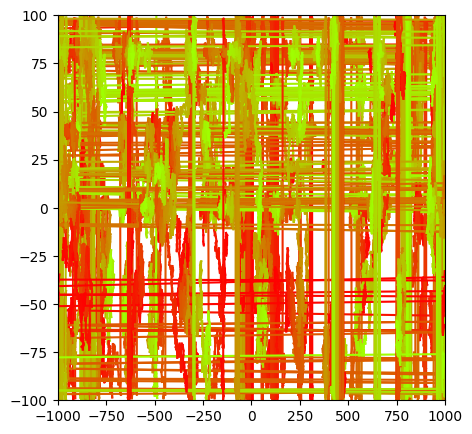

In [4]:
#moves filament list
def moveFilamentList(filament_list):
    for f in filament_list:
        x=f.position[0]+0.000001*30
        y=f.position[1]
        f.position= ((x+xrange[1]) % (xrange[1]-xrange[0])-xrange[1],(y+yrange[1]) % (yrange[1]-yrange[0])-yrange[1])

def nearestMonomer(monomers,p):
    closest=monomers[0]
    for m in monomers:
        if abs(m-p)<=abs(closest-p):
            closest=m
    return closest

#corrects movement by checking if near filmanent
def correctByFilament(particle_list):
    for p in particle_list:
        for f in filament_list:
            yvalue=f.position[1]
            monomers=[]
            fstart=f.position[0]-flength/2
            monomerlength=flength/40
            for i in range(40):
                monomers.append(fstart+monomerlength*i+monomerlength/2)
            m=nearestMonomer(monomers,p.position[0])
            dx=p.position[0]-m
            dy=p.position[1]-yvalue
            dist=math.sqrt(dx**2+dy**2)
            n=15
            if dist<=n:
                x=p.position[0]-(0.000001*13.66*dx*(n+2.5-dist)/dist)/(4.1/40000)
                y=p.position[1]-(0.000001*13.66*dy*(n+2.5-dist)/dist)/(4.1/40000)
                p.position=((x+xrange[1]) % (xrange[1]-xrange[0])-xrange[1],(y+yrange[1]) % (yrange[1]-yrange[0])-yrange[1])

#moves entire list by one step; takes collisions into account
def moveParticleList(particle_list):
    for i in range(len(particle_list)):
        p1=particle_list[i]
        for j in range(i+1,len(particle_list)):
            p2=particle_list[j]
            NP1=newParticlePos(p1)
            NP2=newParticlePos(p2)
            if (math.sqrt((NP2[0]-NP1[0])**2+(NP2[1]-NP1[1])**2))<=5:
                dist=(math.sqrt((NP2[0]-NP1[0])**2+(NP2[1]-NP1[1])**2))
                rforce=(0.000001*8.2*(5-dist)/dist)/(4.1/40000)
                x1=NP1[0]-(NP1[0]-p1.position[0])*rforce
                y1=NP1[1]-(NP1[1]-p1.position[1])*rforce
                x2=NP2[0]-(NP2[0]-p2.position[0])*rforce
                y2=NP2[1]-(NP2[1]-p2.position[1])*rforce
            else:
                x1=NP1[0]
                y1=NP1[1]
                x2=NP2[0]
                y2=NP2[1]
            p1.position= ((x1+xrange[1]) % (xrange[1]-xrange[0])-xrange[1],(y1+yrange[1]) % (yrange[1]-yrange[0])-yrange[1])
            p2.position= ((x2+xrange[1]) % (xrange[1]-xrange[0])-xrange[1],(y2+yrange[1]) % (yrange[1]-yrange[0])-yrange[1])
    

#method to change position of particle by a unit step 
def newParticlePos(particle_name):
    x=newBrownianLocation(particle_name,0.000001)[0]
    y=newBrownianLocation(particle_name,0.000001)[1]
    return (x,y)

#calculate what the new location would be just based off Brownian Motion
def newBrownianLocation(particle_name,dt):
    theta=random.uniform(0,2*PI)
    r=math.sqrt(160000*dt)
    dx=r*math.cos(theta)
    dy=r*math.sin(theta)

    return (particle_name.position[0]+dx,particle_name.position[1]+dy)

#places particle randomly from -1 to 1 in 2D space
def placeParticle(particle_list, n, xrange, yrange):

    #create a particle object using this position
    for i in range(n):
        initial_positionx = np.random.uniform(xrange[0],xrange[1])
        initial_positiony = np.random.uniform(yrange[0],yrange[1])
        x=particle(2.5, (initial_positionx,initial_positiony),i)
        particle_list.append(x)

#places ftszs
def placeFilament(fil_list, n):
    for b in range(n):
        bundlestart=b*(xrange[1]-xrange[0])/n+(xrange[1]-xrange[0])/(2*n)
        for i in range(5):
            xi=np.random.uniform(bundlestart,bundlestart+50)
            yi=i*20
            F=ftsz(flength,(xi,yi),i)
            fil_list.append(F)

#plots particle position as a colored time series
def plotColorSpec(lx,ly):
    length=len(lx)
    t = np.arange(length)
    plt.scatter(lx,ly,c=t)
    plt.show()

def plotLineSpec(lx,ly):
    length=len(lx)
    r=0
    g=0
    b=0
    for i in range(length-1):
        r=1-(.75*i)/(2*length)
        g=i/(length)
        b=2*i/(length**2)
        plt.plot([lx[i],lx[i+1]],[ly[i],ly[i+1]],c=[r,g,b])

#create a simulation function
def simulation(steps,numparticles,numfbundles,xrange,yrange):
    global particle_list
    global filament_list
    particle_list=[]
    filament_list = []
    #initialize particles + filaments
    placeParticle(particle_list,numparticles,xrange,yrange)
    placeFilament(filament_list,numfbundles)

    Ppositions = []
    Fpositions = []

    MP=[]
    FP=[]
    for i in range(steps):
        moveFilamentList(filament_list)
        moveParticleList(particle_list)
        correctByFilament(particle_list)
        L1=[]
        for p in particle_list:
            L1.append(p.position)
        MP.append(L1)

        L2=[]
        for f in filament_list:
            L2.append(f.position)
        FP.append(L2)

    for i in range(steps):
        posix=[]
        posiy=[]
        for j in range(len(particle_list)):
            posix.append(MP[i][j][0])
            posiy.append(MP[i][j][1])
        Ppositions.append([posix,posiy])
    
    for i in range(steps):
        posix=[]
        posiy=[]
        for j in range(len(filament_list)):
            posix.append(FP[i][j][0])
            posiy.append(FP[i][j][1])
        Fpositions.append([posix,posiy])

    for i in range(numparticles):
        lx=[]
        ly=[]
        for j in range(steps):
            lx.append(Ppositions[j][0][i])
            ly.append(Ppositions[j][1][i])
        plotLineSpec(lx,ly)

    return Ppositions,Fpositions

#run the simulation and store the data in X and Y
xrange=(-1000,1000)
flength=200
yrange=(-100,100)
plt.figure(figsize=(5,5))
plt.xlim(xrange)
plt.ylim(yrange)
(Ppositions,Fpositions) = simulation(1000,80,5,xrange,yrange)
nparticles = len(particle_list)
nfilaments = len(filament_list)



#### Animating the 2D random walk

MovieWriter ffmpeg unavailable; using Pillow instead.


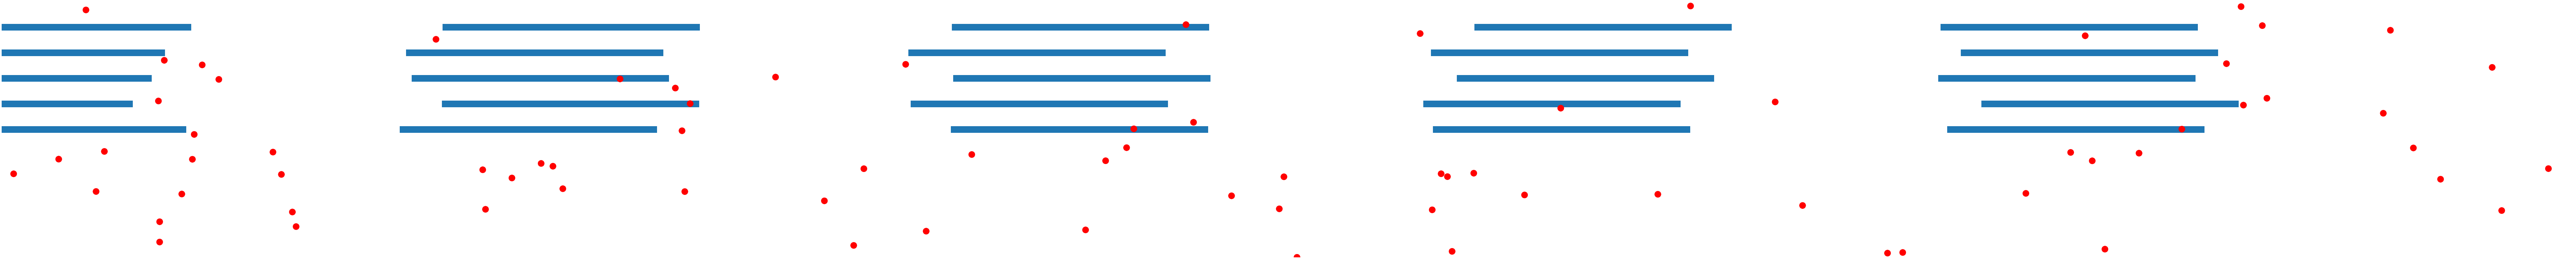

In [5]:
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import random

#create our figure for the animation
fig, ax = plt.subplots()
fig.set_size_inches(xrange[1]/5,yrange[1]/5)
fig.set_dpi(50)

def animate(i):

    ax.clear()

    for j in range(nfilaments):
        Filaments=plt.Line2D((Fpositions[i][0][j]-flength/2,Fpositions[i][0][j]+flength/2),(Fpositions[i][1][j],Fpositions[i][1][j]))
        ax.add_patch(Rectangle((Fpositions[i][0][j]-flength/2,Fpositions[i][1][j]-2.5),flength,5))

    for j in range(nparticles):
        
        Drawing_colored_circle = plt.Circle((Ppositions[i][0][j],Ppositions[i][1][j]),2.5,color='red')
        ax.add_artist( Drawing_colored_circle)
    

    plt.xlim(xrange)
    plt.ylim(yrange)
    plt.axis('off')

ani = FuncAnimation(fig,animate,frames=400,interval=1,repeat=False)

ani.save('2D.gif')

#### 1D Walk Methods and Animation

In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import random

#create our figure for the animation
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
fig.set_dpi(50)

#method to obtain the position of a particle
def getParticlePosition(particle_name):
    return particle_name.position

#method to change position of particle by a unit step 
def moveParticle(particle_name,step):
    particle_x = getParticlePosition(particle_name)
    angle=random.uniform(1,360)
    particle_name.position = (particle_x + random.choice([-1,0,1]))

#places particle randomly from -1 to 1 in 2D space
def placeParticle(particle_list, n):

    #create a particle object using this position
    for i in range(n):
        initial_positionx = np.random.uniform(-1,1)
        x=particle(2.5, initial_positionx,i)
        particle_list.append(x)

#prints particle ID
def printID(particle_name):
    print(particle_name.ID)

#create a simulation function
def simulation(steps,numparticles):
    particle_list = []
    #initialize your particles
    placeParticle(particle_list,numparticles)

    positions = []
    
    for i in range(len(particle_list)):
        posix=[]
        posiy=[]
        for j in range(steps):
            moveParticle(particle_list[i],1)
            coordx = getParticlePosition(particle_list[i])
            posix.append(coordx)
        positions.append(posix)
    
    #for i in range(numparticles):
    #    plt.plot(positions[i][0],positions[i][1])
    #    plotColorSpec(positions[i][0],positions[i][1])

    x = positions[0]

    return x

#run the simulation and store the data in X and Y
x1 = simulation(1000,1)

def animate(i):

    ax.clear()

    x_pos = x1[i]

    Drawing_colored_circle = plt.Circle((x_pos,10),1,color='red')
    ax.add_artist( Drawing_colored_circle)

    plt.xlim([-40,40])
    plt.ylim([-30,70])
    plt.axis('off')

ani = FuncAnimation(fig,animate,frames=100,interval=10,repeat=False)

ani.save('1D.gif')